### Cómo se hace una convolución?

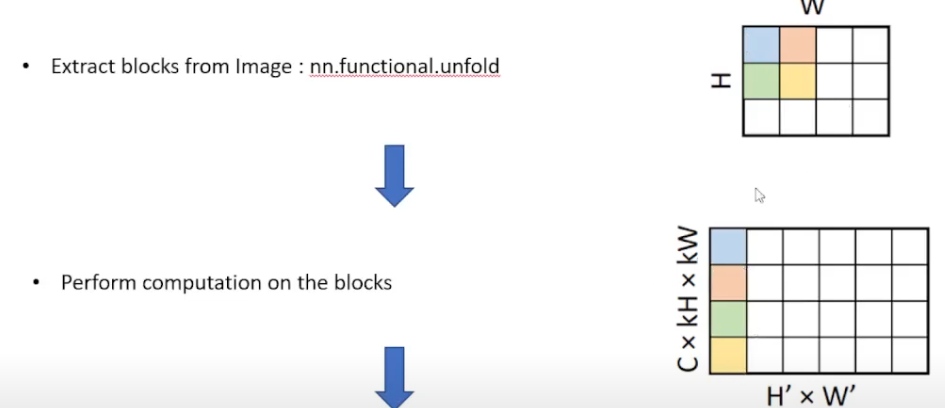

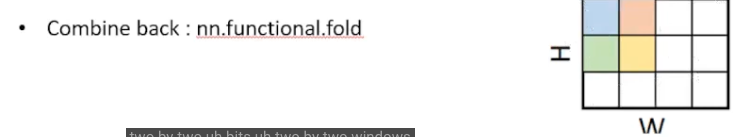

Paso mis bloques a una columna y luego los vuelvo a pasar a su forma inicial, se hace esto para poder manejar los datos más fácilmente

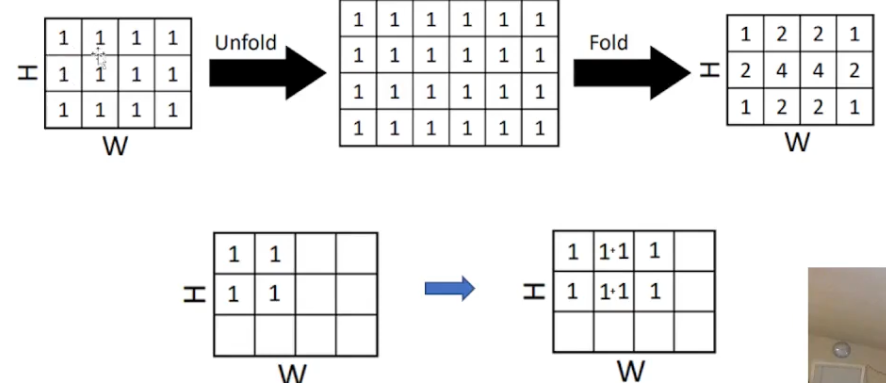

Si cojo cuadritos de 2x2 en la primera matriz, puedo encontrar 6 diferentes duadritos, por eso hay seis columnas cuando hago el unfold

Ahora sí, qué estoy haciendo en la primera matriz de abajo? cojo la primera columna de la matriz aumetada y pongo sus 4 valores, luego cojo los valores de la siguiente columna y los pongo después de los valores anteriores que ya había solocado, por eso se tiene que sumar esos unos, porque se superponen los valores

# Cómo se hace esto en python?

fold: https://pytorch.org/docs/stable/generated/torch.nn.Fold.html <br>
unfold: https://pytorch.org/docs/stable/generated/torch.nn.Unfold.html

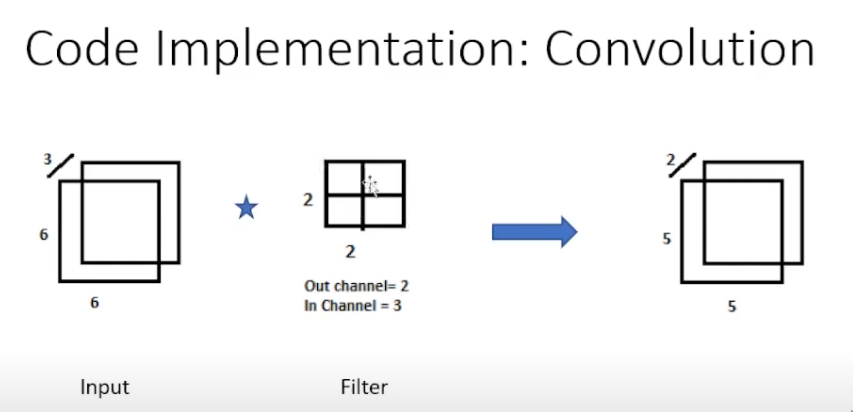

In [1]:
import torch

In [10]:
# esos numeros significan que la imagen es de 3 canales y de 6x6
inp = torch.ones(1,3,6,6)
inp [0,1,:,:] = 2
#esos numeros significan que la imagen es de 3 canales y de 2x2
w = torch.ones(2,3,2,2)

In [11]:
inp

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]],

         [[2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2.]],

         [[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])

In [12]:
w

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [13]:
unfolded = torch.nn.functional.unfold(inp, (2,2))
unfolded.shape

torch.Size([1, 12, 25])

el 12 es poe 2*2*3canales que tiene mi input
25 es el # de columnas

In [15]:
unfolded[0,:,1]

tensor([1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.])

Ahora se hace la convolución, por cada chunck de 2*2 voy a obtener un número, si tengo 2 caneles, obtendría dos números

In [16]:
conv_output = unfolded.transpose(1,2).matmul(w.view(w.size(0), -1).t()).transpose(1,2)
#este código es para hacer la convolución de una imagen de 6x6 con un filtro de 2x2
#el matmul es para multiplicar los valores de la imagen con los valores del filtro
#el transpose es para cambiar las dimensiones de la matriz

In [18]:
w.view(w.size(0), -1).t().shape

torch.Size([12, 2])

In [19]:
unfolded.transpose(1,2).shape

torch.Size([1, 25, 12])

In [20]:
conv_output.shape

torch.Size([1, 2, 25])

In [21]:
unfolded.shape

torch.Size([1, 12, 25])

In [ ]:
#Al comparar las dimensiones de las matrices de input y output podemos ver que se cambia el 2 por un 12 porque se están multiplicando los valores de la imagen con los valores del filtro

In [23]:
out = torch.nn.functional.fold(conv_output, (5,5), (1,1))
# es (1,1) porque es el stride

In [24]:
out.shape

torch.Size([1, 2, 5, 5])

In [25]:
(torch.nn.functional.conv2d(inp, w) - out).abs().sum()

tensor(0.)